In [1]:
import pandas as pd

In [ ]:
#Power query in excel was used to combine the individual month sales record into a single files consisting of all months

In [6]:
all_data = pd.read_excel(r"C:\Users\hp\Desktop\Ojim\Data science\New folder\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Overall.xlsx")

# Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

Drop rows of NAN

In [12]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,NaN,Product,NaN,NaN,NaT,Purchase Address
1149,NaN,Product,NaN,NaN,NaT,Purchase Address
1155,NaN,Product,NaN,NaN,NaT,Purchase Address
2878,NaN,Product,NaN,NaN,NaT,Purchase Address
2893,NaN,Product,NaN,NaN,NaT,Purchase Address


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional columns
Add month column

In [19]:
all_data["Months"] = all_data["Order Date"].dt.month

In [78]:
all_data=all_data.loc[all_data['Purchase Address']!="Purchase Address"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0


# Make columns correct type

In [84]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Add city column

In [92]:
split_addresses = all_data['Purchase Address'].str.split(', ')

split_addresses

0                    [917 1st St, Dallas, TX 75001]
2               [682 Chestnut St, Boston, MA 02215]
3            [669 Spruce St, Los Angeles, CA 90001]
4            [669 Spruce St, Los Angeles, CA 90001]
5               [333 8th St, Los Angeles, CA 90001]
                            ...                    
186845     [840 Highland St, Los Angeles, CA 90001]
186846    [216 Dogwood St, San Francisco, CA 94016]
186847       [220 12th St, San Francisco, CA 94016]
186848     [511 Forest St, San Francisco, CA 94016]
186849     [250 Meadow St, San Francisco, CA 94016]
Name: Purchase Address, Length: 185950, dtype: object

In [93]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX)
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA)
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA)
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA)
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles (CA)


# Data Exploration!

# Question 1: What was the best month for sales? How much was earned that month?

In [99]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX),23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.99
...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9.0,Los Angeles (CA),8.97
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9.0,San Francisco (CA),700.00
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9.0,San Francisco (CA),700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9.0,San Francisco (CA),379.99


In [177]:
result1= all_data.groupby(['Months']).sum()
result1

C:\Users\hp\AppData\Local\Temp\ipykernel_11544\1239753376.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1= all_data.groupby(['Months']).sum()


,Order ID,Quantity Ordered,Price Each,Sales,Hours,Minutes,Count
Months,,,,,,,
1.0,1.421631e+09,10903.0,1811768.38,1822256.73,139485,282440,9709
2.0,1.871053e+09,13449.0,2188884.72,2202022.42,172669,354885,11975
3.0,2.564811e+09,17005.0,2791207.83,2807100.38,218969,447559,15153
4.0,3.387347e+09,20558.0,3367671.02,3390670.24,262259,544186,18279
5.0,3.345872e+09,18667.0,3135125.13,3152606.75,238780,487899,16566
6.0,2.932976e+09,15253.0,2562025.61,2577802.26,195528,402436,13554
7.0,3.284140e+09,16072.0,2632539.56,2647775.76,206169,417349,14293
8.0,2.899374e+09,13448.0,2230345.42,2244467.88,172289,353857,11961
9.0,2.948727e+09,13109.0,2084992.09,2097560.13,168513,341698,11621


range(1, 13)


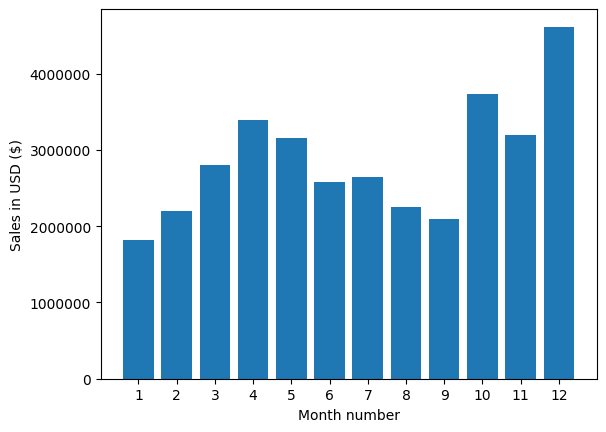

In [189]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,result1['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.ticklabel_format(axis="y", style="plain", useOffset=False)
plt.show()

# Question 2: What city sold the most product?

In [179]:
result2 = all_data.groupby(['City']).sum()
result2

C:\Users\hp\AppData\Local\Temp\ipykernel_11544\3184785168.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2 = all_data.groupby(['City']).sum()


,Order ID,Quantity Ordered,Price Each,Months,Sales,Hours,Minutes,Count
City,,,,,,,,
Atlanta (GA),3.423838e+09,16602.0,2779908.20,104794.0,2795498.58,214264,442932,14881
Austin (TX),2.280982e+09,11153.0,1809873.61,69829.0,1819581.75,141946,289060,9905
Boston (MA),4.598265e+09,22528.0,3637409.77,141112.0,3661642.01,288225,590442,19934
Dallas (TX),3.415644e+09,16730.0,2752627.82,104620.0,2767975.40,214390,435155,14820
Los Angeles (CA),6.811085e+09,33289.0,5421435.23,208325.0,5452570.80,427444,866638,29605
New York City (NY),5.736334e+09,27932.0,4635370.83,175741.0,4664317.43,357696,733598,24876
Portland (ME),5.632663e+08,2750.0,447189.25,17144.0,449758.27,35211,72856,2455
Portland (OR),2.305595e+09,11303.0,1860558.22,70621.0,1870732.34,144421,295533,10010
San Francisco (CA),1.030444e+10,50239.0,8211461.74,315520.0,8262203.91,643265,1319477,44732


C:\Users\hp\AppData\Local\Temp\ipykernel_11544\712359030.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]


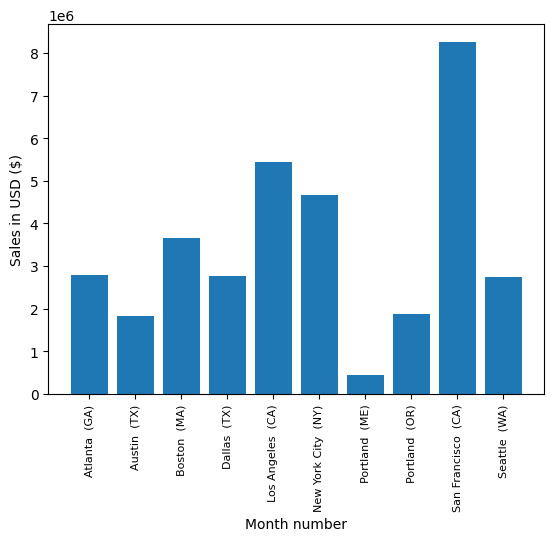

In [180]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]
keys
plt.bar(keys,result2['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [181]:
all_data["Hours"]=all_data["Order Date"].dt.hour
all_data["Minutes"]=all_data["Order Date"].dt.minute
#all_data['Count'] = 1
all_data.head()
all_data.drop(columns=["Count"], inplace=True)


In [183]:
all_data.groupby(['Hours']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales,Minutes
Hours,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


C:\Users\hp\AppData\Local\Temp\ipykernel_11544\102111127.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hours'])]


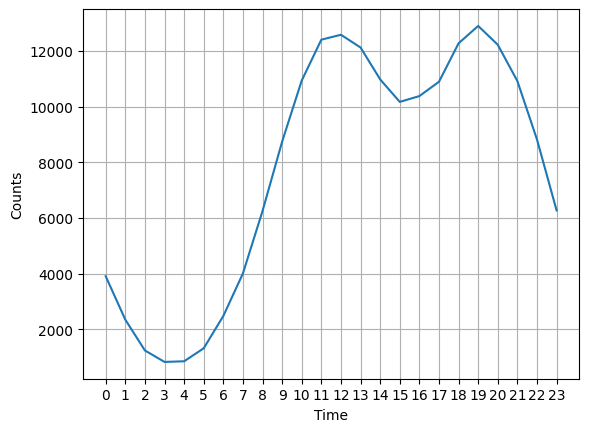

In [184]:
keys = [pair for pair, df in all_data.groupby(['Hours'])]

plt.plot(keys, all_data.groupby(['Hours']).count()['Quantity Ordered'])
plt.xticks(keys)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Counts")
plt.show()

# My recommendation is slightly before 11-12am or 7pm

# Question 4: What products are most often sold together?

In [185]:

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\hp\AppData\Local\Temp\ipykernel_11544\585992382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [186]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Products that often sold Most by a combination of 3:

In [150]:

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


# Question 5: What product sold the most? Why do you think it sold the most?

In [151]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,City,Sales,Hours,Minutes,Count
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,Dallas (TX),23.90,8,46,1
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),99.99,22,30,1
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.00,14,38,1
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.99,14,38,1
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles (CA),11.99,9,27,1


In [160]:
prod= all_data.groupby('Product').sum()
prod

C:\Users\hp\AppData\Local\Temp\ipykernel_11544\1503843354.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod= all_data.groupby('Product').sum()


,Order ID,Quantity Ordered,Price Each,Months,Sales,Hours,Minutes,Count
Product,,,,,,,,
20in Monitor,9.508897e+08,4129.0,451068.99,29336.0,454148.71,58764,122252,4101
27in 4K Gaming Monitor,1.442589e+09,6244.0,2429637.70,44440.0,2435097.56,90916,184331,6230
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558.0,1132424.50,107540,219948,7507
34in Ultrawide Monitor,1.418986e+09,6199.0,2348718.19,43304.0,2355558.01,89076,183480,6181
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558.0,106118.40,298342,609039,20577
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370.0,92740.83,297332,612113,20641
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477.0,2349150.00,223304,455570,15549
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113.0,1345565.43,192445,392603,13325
Flatscreen TV,1.110943e+09,4819.0,1440000.00,34224.0,1445700.00,68815,142789,4800


In [157]:
products= [product for product,df in all_data.groupby('Product')]

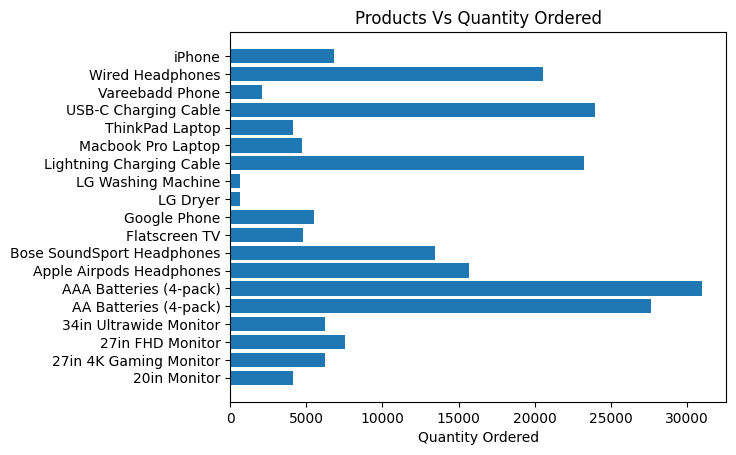

<Figure size 640x480 with 0 Axes>

In [173]:
plt.barh(products, prod["Quantity Ordered"])
plt.xlabel("Quantity Ordered")
plt.title("Products Vs Quantity Ordered")
plt.show()
plt.tight_layout()


C:\Users\hp\AppData\Local\Temp\ipykernel_11544\2056991298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\hp\AppData\Local\Temp\ipykernel_11544\2056991298.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\hp\AppData\Local\Temp\ipykernel_11544\2056991298.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


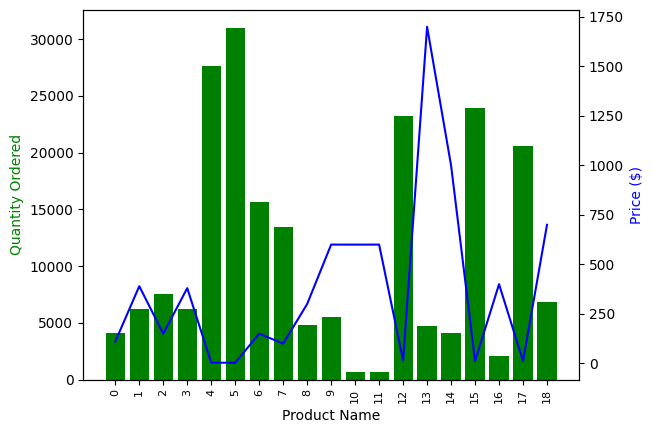

In [176]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, prod["Quantity Ordered"], color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()